In [1]:
from junifer.storage import HDF5FeatureStorage
from julearn.api import run_cross_validation
from julearn.pipeline import PipelineCreator
from julearn.viz import plot_scores
from julearn.stats.corrected_ttest import corrected_ttest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.


In [2]:
df_demographics = pd.read_csv('./data/IXI_demograpic_data.csv',sep=',')
df_demographics.rename(columns={"IXI_ID": "subject"}, inplace=True)
df_demographics['subject'] = df_demographics['subject'].apply(lambda x: f'sub-IXI{x}')
storage = HDF5FeatureStorage(uri='./data/IXI_Histograms_Parcels.hdf5')
df_parcellations = storage.read_df('VBM_GM_Schaefer100x17_mean_aggregation')
df_hists = storage.read_df('VBM_GM_Histogram_100bins_IXI_hist')

In [3]:
df_demographics = pd.read_csv('/home/hsreekri/Julearn_predictions/data/IXI_demograpic_data.csv',sep=',')
df_demographics.rename(columns={"IXI_ID": "subject"}, inplace=True)
df_demographics['subject'] = df_demographics['subject'].apply(lambda x: f'sub-IXI{x}')

In [4]:
df_hists.columns = df_hists.columns.astype(str)
X_hists = list(df_hists.columns)
X_hists = X_hists[1:100]
df_full_histograms = df_hists.merge(df_demographics, on="subject")


In [5]:
df_full_histograms = df_full_histograms.dropna()

In [6]:
df_parcellations.columns = df_parcellations.columns.astype(str)
X_parcels = list(df_parcellations.columns)

X_parcels = X_parcels[1:100]
df_full_parcellations = df_parcellations.merge(df_demographics, on="subject")
df_full_parcellations = df_full_parcellations.dropna()

In [8]:
creator = PipelineCreator(problem_type="classification")
creator.add("zscore")
creator.add(
    "svm")

In [11]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["balanced_accuracy"]
scores_hists, model_hists, inspector_hists = run_cross_validation(
    X=X_hists,
    y='SEX_ID (1=m, 2=f)',
    data=df_full_histograms,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']. They will be treated as continuous.
  warn_with_log(



In [14]:
scores_hists

,fit_time,score_time,estimator,test_balanced_accuracy,train_balanced_accuracy,n_train,n_test,repeat,fold,cv_mdsum
0,0.011028,0.006061,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.622206,0.694193,378,127,0,0,bc7087515161a73a5a6aff57863f3803
1,0.009848,0.005786,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.601961,0.718949,379,126,0,1,bc7087515161a73a5a6aff57863f3803
2,0.009801,0.005869,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.684091,0.681507,379,126,0,2,bc7087515161a73a5a6aff57863f3803
3,0.009709,0.006043,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.574519,0.736252,379,126,0,3,bc7087515161a73a5a6aff57863f3803


In [12]:
search_params = {
    "kind": "optuna",
    "cv":4
}

scoring = ["balanced_accuracy"]
scores_parcels, model_parcels, inspector_parcels= run_cross_validation(
    X=X_parcels,
    y='SEX_ID (1=m, 2=f)',
    data=df_full_parcellations,
    search_params=search_params,
    model=creator,
    return_train_score=True,
    return_inspector=True,
    cv=4,
    scoring = scoring,
)

/home/hsreekri/Hsreekri/lib/python3.11/site-packages/julearn/prepare.py:505: RuntimeWarning: The following columns are not defined in X_types: ['LH_VisCent_ExStr_2', 'LH_VisCent_Striate_1', 'LH_VisCent_ExStr_3', 'LH_VisPeri_ExStrInf_1', 'LH_VisPeri_StriCal_1', 'LH_VisPeri_ExStrSup_1', 'LH_SomMotA_1', 'LH_SomMotA_2', 'LH_SomMotB_Aud_1', 'LH_SomMotB_S2_1', 'LH_SomMotB_S2_2', 'LH_SomMotB_Cent_1', 'LH_DorsAttnA_TempOcc_1', 'LH_DorsAttnA_ParOcc_1', 'LH_DorsAttnA_SPL_1', 'LH_DorsAttnB_PostC_1', 'LH_DorsAttnB_PostC_2', 'LH_DorsAttnB_PostC_3', 'LH_DorsAttnB_FEF_1', 'LH_SalVentAttnA_ParOper_1', 'LH_SalVentAttnA_Ins_1', 'LH_SalVentAttnA_Ins_2', 'LH_SalVentAttnA_ParMed_1', 'LH_SalVentAttnA_FrMed_1', 'LH_SalVentAttnB_PFCl_1', 'LH_SalVentAttnB_PFCmp_1', 'LH_LimbicB_OFC_1', 'LH_LimbicA_TempPole_1', 'LH_LimbicA_TempPole_2', 'LH_ContA_IPS_1', 'LH_ContA_PFCl_1', 'LH_ContA_PFCl_2', 'LH_ContB_PFClv_1', 'LH_ContC_pCun_1', 'LH_ContC_pCun_2', 'LH_ContC_Cingp_1', 'LH_DefaultA_PFCd_1', 'LH_DefaultA_pCunPCC_1'

In [13]:
scores_parcels

,fit_time,score_time,estimator,test_balanced_accuracy,train_balanced_accuracy,n_train,n_test,repeat,fold,cv_mdsum
0,0.010482,0.005134,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.733855,0.917981,378,127,0,0,bc7087515161a73a5a6aff57863f3803
1,0.009353,0.005820,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.670980,0.918245,379,126,0,1,bc7087515161a73a5a6aff57863f3803
2,0.009387,0.005811,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.715909,0.919834,379,126,0,2,bc7087515161a73a5a6aff57863f3803
3,0.009312,0.005708,"(SetColumnTypes(X_types={}), StandardScaler(),...",0.661859,0.925486,379,126,0,3,bc7087515161a73a5a6aff57863f3803


In [15]:
plot_scores(scores_hists,scores_parcels)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a23eb6f9-fe66-4a71-ae61-347de0bd5e47': {'version…

<Axes: xlabel='SEX_ID (1=m, 2=f)', ylabel='8'>

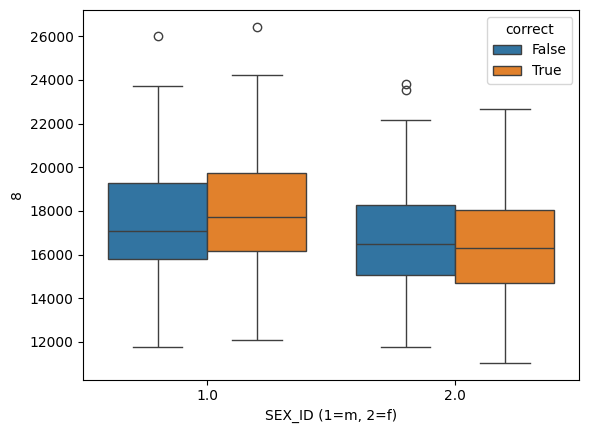

In [22]:
predictions = inspector_hists.folds.predict()
to_merge = df_full_histograms[["SEX_ID (1=m, 2=f)", "8"]].iloc[predictions.index]
to_plot = pd.concat([predictions, to_merge], axis=1)


# %%
to_plot["correct"] = to_plot["repeat0_p0"] == to_plot["target"]
# %%
sns.boxplot(data=to_plot, x="SEX_ID (1=m, 2=f)", hue="correct", y="8")

<Axes: xlabel='SEX_ID (1=m, 2=f)', ylabel='LH_VisCent_Striate_1'>

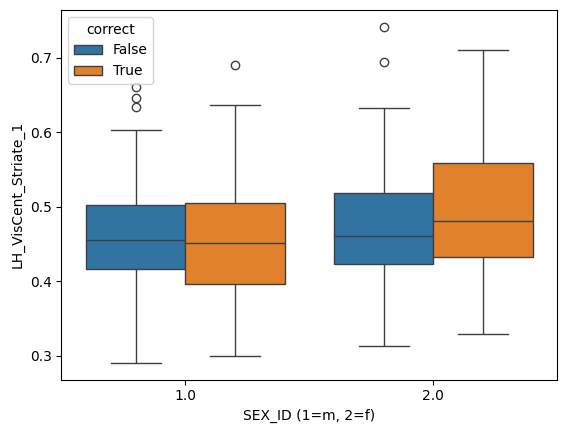

In [25]:
predictions = inspector_parcels.folds.predict()
to_merge = df_full_parcellations[["SEX_ID (1=m, 2=f)", "LH_VisCent_Striate_1"]].iloc[predictions.index]
to_plot = pd.concat([predictions, to_merge], axis=1)

to_plot["correct"] = to_plot["repeat0_p0"] == to_plot["target"]
sns.boxplot(data=to_plot, x="SEX_ID (1=m, 2=f)", hue="correct", y="LH_VisCent_Striate_1")